#Задача классификации. Метод k ближайших соседей. (kNN)
Задача классификации предсказывает категориальный признак.

(Сейчас мы будем определять пол исходя из веса и роста человека)


In [12]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier #Импорт необходимой нам библиотеки

In [14]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
#Создание укороченной таблицы т.к. мы ищем зависимость роста от размера ноги и наоборот
df_cut=df[['Growth','Weight','Sex']]
#Исключаем нулевые значения
df_cut=df_cut.dropna()

In [ ]:
#Визуализируем распределения наших данных для наглядности
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Sex') 

Метод kNN говорит о том, что необходимо посмотреть на пол ближайших соседей. Которые расположены рядом с нашим новым человеком.

Для того, чтобы данный метод корректно считал расстояние до ближайших соседей необходимо наши данные отномрмировать. Чтобы они находились в одних  условных единицах. Допустим Рост 1,8м и вес 100кг. Не совсем корректны для такого подсчета и для графиков. Т.к. идет существенное сужение масштаба по одной оси. Поэтому масштаб по всем признакам должен быть соизмерим.

In [18]:
#Подключаем стандартные нормалировщик
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
#Обучаем нормировщик методом .fit() и переводим в таблицу чисел методом .values.reshape(-1 - всегда,2 - должен соответствовать количеству признаков))
scaler.fit(df_cut[['Weight', 'Growth']].values.reshape(-1,2))
#Нормируем данные методом .transform()
arr=scaler.transform(df_cut[['Weight', 'Growth']].values.reshape(-1,2))

In [ ]:
#посмотрим на полученные данные
arr

Гипотезы: мужчины и женщины образуют два облака. Причем для многих точек выполнено условие: если соседние точки мужчины (женщины), то и данная точка - мужчина(женщина)

In [29]:
#Создаем модель искусственного интеллекта
#В скобках указано скольсо "соседей" мы используем для принятия решений
#С этим значением необходимо так же "поиграться" для определения наилучшего количества "соседей"
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(arr, y=df_cut['Sex'].values)

KNeighborsClassifier(n_neighbors=3)

Загружаем тестовую выборку

In [22]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex']]
df_test_cut=df_test_cut.dropna() #удлаяем данные, имеющие пустые значения

In [23]:
#нормируем нашу таблицу
arr_test=scaler.transform(df_test_cut[['Weight', 'Growth']].values.reshape(-1,2))

ВНИМАНИЕ: Через функцию predict прогоняем объекты **тестовой** выборки

In [24]:
df_test_cut['Predicted']=model.predict(arr_test)

Метрики качества модели классификации

In [25]:
#Матрица сопряженности(предсказанные значения, истинные значения)
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,40,3
мужской,7,27


In [28]:
#Для более наглядной визуализации запишем следующий код:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

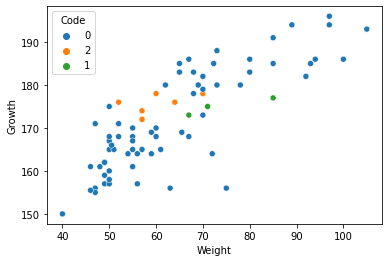

In [27]:
sns.scatterplot(data=df_test_cut, x='Weight', y='Growth', hue='Code') 